In [74]:
# Imports
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [75]:
# Read data from CSV and remove unnecessary columns
df = pd.read_csv('../data/CNA15-PopPerYearByAgeGroup.csv', index_col='Year')
df.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)

# We will need separate models for each age group
age_groups = np.array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years', '85 years and over'])

# 80/20 train test split
train_size = int(len(df) * 0.8)
train, test = df[:train_size + 1], df[train_size:]

In [76]:
# Hyperparams
kernel = ConstantKernel(1.0, (1e-4, 1e5)) * RBF(1.0, (1e-4, 1e2)) + WhiteKernel(1e-2, (1e-5, 1e2))
restarts = 5

In [77]:
# Training Gaussian Process Regressors

# Storing models for each age group
models = {}

# To be used in evaluation
r_squareds = []
rmses = []

for ag in age_groups:
    y_train = train[ag]
    X_train = np.array(y_train.index).reshape(-1, 1)
    
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=restarts)
    gp.fit(X_train, y_train)
    
    y_test = test[ag]
    X_test = np.array(y_test.index).reshape(-1, 1)
    
    models[ag] = gp
    
    r_squareds.append(gp.score(X_test, y_test))
    y_pred = gp.predict(X_test)
    rmses.append(root_mean_squared_error(y_test, y_pred))

C:\Users\bayan\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bayan\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bayan\miniconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bayan\miniconda3\Lib\site-packages\sklearn\gaussian_process

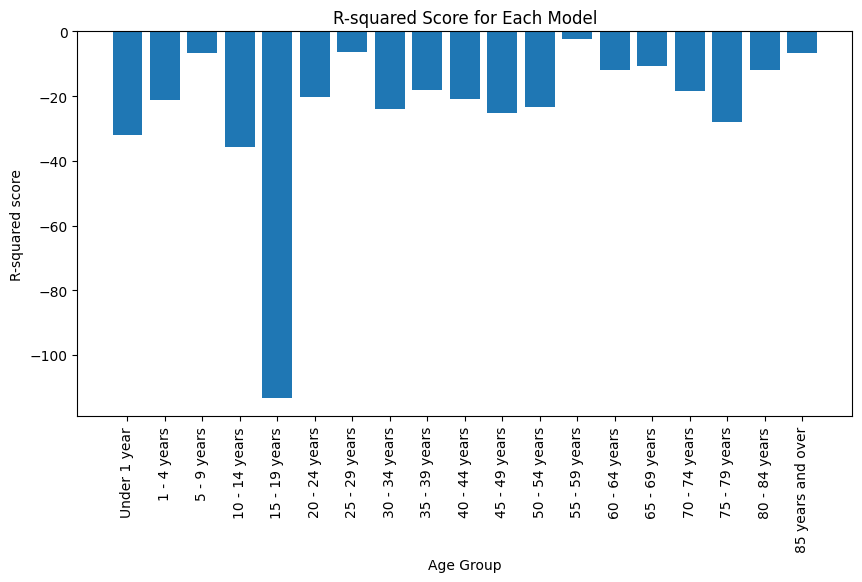

Average r-squared score: -22.97151350207486
Average r-squared score for elderly populations: -15.105815340751533


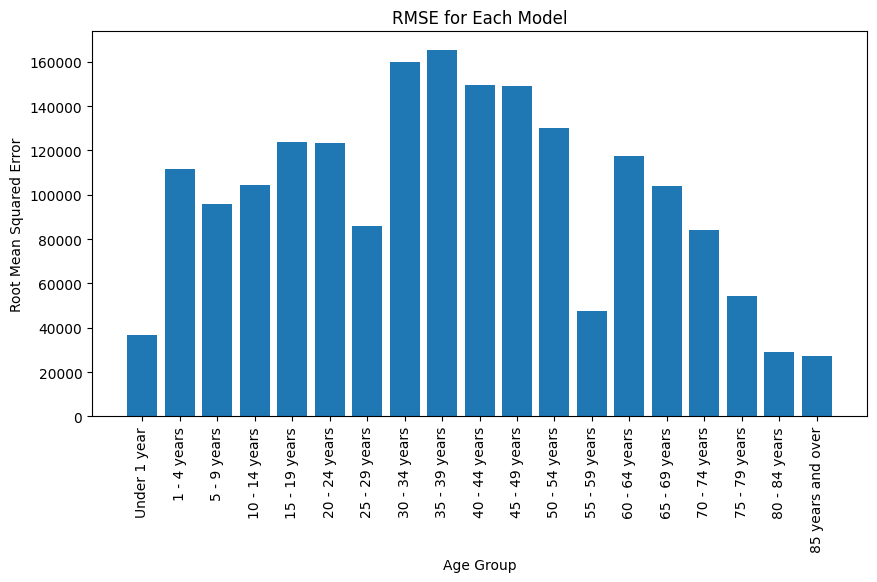

Average RMSE: 99989.36
Average RMSE for elderly populations: 59755.92


In [78]:
# Visualising each model's performance
# R squared scores
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), r_squareds)
plt.title('R-squared Score for Each Model')
plt.ylabel('R-squared score')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_r_score = sum(r_squareds) / len(r_squareds)
print('Average r-squared score:', avg_r_score)

avg_r_score = sum(r_squareds[-5:]) / 5
print('Average r-squared score for elderly populations:', avg_r_score)

# Root mean squared error (RMSE)
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(age_groups)), rmses)
plt.title('RMSE for Each Model')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Age Group')
plt.xticks(ticks=np.arange(len(age_groups)), labels=age_groups, rotation=90)
plt.show()

avg_rmse = round(sum(rmses) / len(rmses), 2)
print('Average RMSE:', avg_rmse)

avg_rmse = round(sum(rmses[-5:]) / 5, 2)
print('Average RMSE for elderly populations:', avg_rmse)